In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

%matplotlib inline

In [2]:
df = pd.read_csv('epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


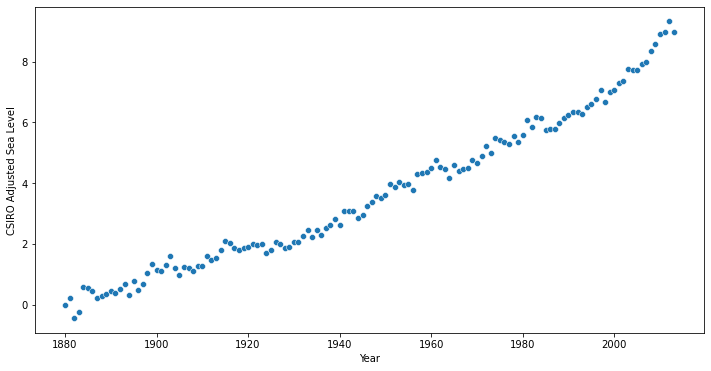

In [30]:
fig, ax = plt.subplots(figsize = (12, 6))

fig = sns.scatterplot(x = 'Year', y='CSIRO Adjusted Sea Level',
               data = df )

plt.show(fig)

In [4]:
df.shape

(134, 5)

In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [7]:
result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

result.slope

0.06304458401213482

In [8]:
result.intercept

-119.06594196773983

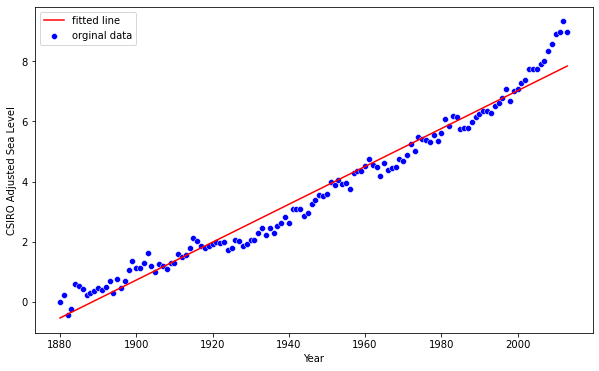

In [12]:
fig = plt.subplots(figsize = (10, 6))

sns.scatterplot(x = 'Year', y='CSIRO Adjusted Sea Level',
               color ='b', data = df, label='orginal data')

plt.plot(df['Year'], result.intercept + result.slope* df['Year'],
        'r', label='fitted line')

plt.legend()
plt.show()

In [13]:
x1 = int(df.iloc[0]['Year'])

x1

1880

In [14]:
x2 = 2049

y1 = result.intercept + x1 * result.slope
y1

-0.5421240249263661

In [15]:
y2 = result.intercept + x2 * result.slope

y2

10.11241067312443

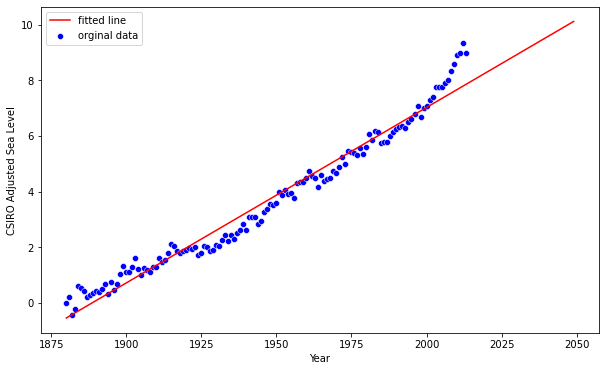

In [16]:
fig = plt.subplots(figsize = (10, 6))

sns.scatterplot(x = 'Year', y='CSIRO Adjusted Sea Level',
               color ='b', data = df, label='orginal data')

plt.plot([x1, x2], [y1, y2],
        'r', label='fitted line')

plt.legend()
plt.show()

In [18]:
# starting the line from year 2000:

x1 = int(df.iloc[120]['Year'])

x1

2000

In [19]:
y1 = result.intercept + x1 * result.slope

y1

7.023226056529808

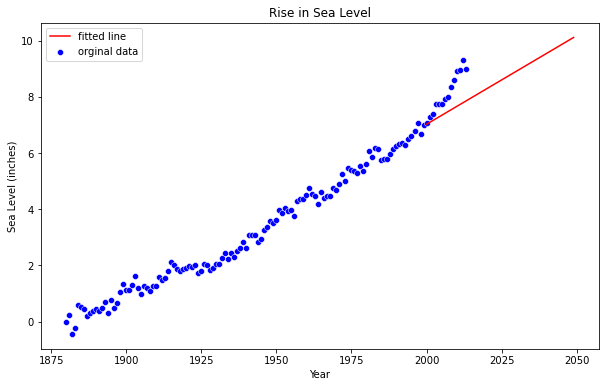

In [21]:
fig = plt.subplots(figsize = (10, 6))

sns.scatterplot(x = 'Year', y='CSIRO Adjusted Sea Level',
               color ='b', data = df, label='orginal data')

plt.plot([x1, x2], [y1, y2],
        'r', label='fitted line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

plt.legend()
plt.show()

In [22]:
new_df = df[120:]

new_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [24]:
new_df.shape

(14, 5)

In [25]:
result1 = linregress(new_df['Year'], new_df['CSIRO Adjusted Sea Level'])

result1.intercept

-325.79346680596467

In [26]:
x1 = int(new_df.iloc[0]['Year'])
x2 = 2049

In [27]:
y1 = result1.intercept + x1 * result1.slope
y2 = result1.intercept + x2 * result1.slope

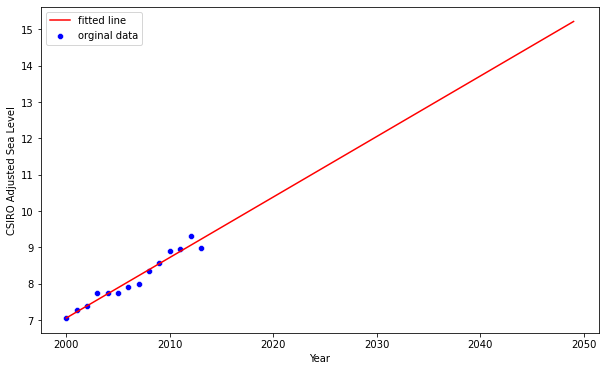

In [28]:
fig = plt.subplots(figsize = (10, 6))

sns.scatterplot(x = 'Year', y='CSIRO Adjusted Sea Level',
               color ='b', data = new_df, label='orginal data')

plt.plot([x1, x2], [y1, y2],
        'r', label='fitted line')

plt.legend()
plt.show()